<center><h1>Data analytics and visualization on COVID - 19 vaccination.		</h1></center>

# 201951072  Jatin Goyal
# 201951039  Balram Choudhary

<h1 ><center>Importing all libraries</center></h1> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
import statsmodels.api as sm
warnings.filterwarnings("ignore")

<h1><center>Reading the data</center></h1> 


# Data reference :- https://github.com/owid/covid-19-data

In [2]:
df = pd.read_csv("data/vaccinations.csv")
df.head(10)

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   
5  Afghanistan      AFG  2021-02-27                 NaN                NaN   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 NaN                NaN   
8  Afghanistan      AFG  2021-03-02                 NaN                NaN   
9  Afghanistan      AFG  2021-03-03                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   
5                      NaN             NaN                     NaN   
6                      NaN             NaN                     NaN   
7                      NaN             NaN                     NaN   
8                      NaN             NaN                     NaN   
9                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                            0.00   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   
5              1367.0                             NaN   
6              1367.0                            0.02   
7              1580.0                             NaN   
8              1794.0                             NaN   
9              2008.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.00                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   
5                            NaN                                  NaN   
6                           0.02                                  NaN   
7                            NaN                                  NaN   
8                            NaN                                  NaN   
9                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            34.0   
2                         NaN                            34.0   
3                         NaN                            34.0   
4                         NaN                            34.0   
5                         NaN                            34.0   
6                         NaN                            34.0   
7                         NaN                            40.0   
8                         NaN                            45.0   
9                         NaN                            50.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      NaN                                  NaN  
1                   1367.0                                0.003  
2                   1367.0    

In [3]:
df.shape

(99834, 16)

<h1 ><center>Doing Analysis on Data</center></h1> 
<p>changing date column to padas date format</p>

In [4]:
df["date"]= pd.to_datetime(df.date)

In [5]:
 df.rename(columns = {'location':'country'}, inplace = True)

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     48276
people_vaccinated                      50638
people_fully_vaccinated                53194
total_boosters                         76750
daily_vaccinations_raw                 57298
daily_vaccinations                       315
total_vaccinations_per_hundred         48276
people_vaccinated_per_hundred          50638
people_fully_vaccinated_per_hundred    53194
total_boosters_per_hundred             76750
daily_vaccinations_per_million           315
daily_people_vaccinated                 1420
daily_people_vaccinated_per_hundred     1420
dtype: int64

As total_boosters and total_boosters_per_hundred column have many null values so we are going to drop them

In [7]:
df = df.drop(['total_boosters','total_boosters_per_hundred'], axis = 1)

Checking all unique countries in dataset

In [8]:
df['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

Dropping the rows that have continents or other values in country columns

In [9]:
unneccesary = ['World', 'Asia', 'Upper middle income',  'Lower middle income', 'High income', 'Low income', 'Africa', 'North America', 'South America', 'Antarctica', 'Europe', 'Australia','European Union']
for col in unneccesary:
    df = df[df['country'] != col]

In [10]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'daily_people_vaccinated', 'daily_people_vaccinated_per_hundred'],
      dtype='object')

<h1><center>Which columns are highly correlated?</center></h1> 

Plotting correlation heatmap to find corelation between columns of a dataset

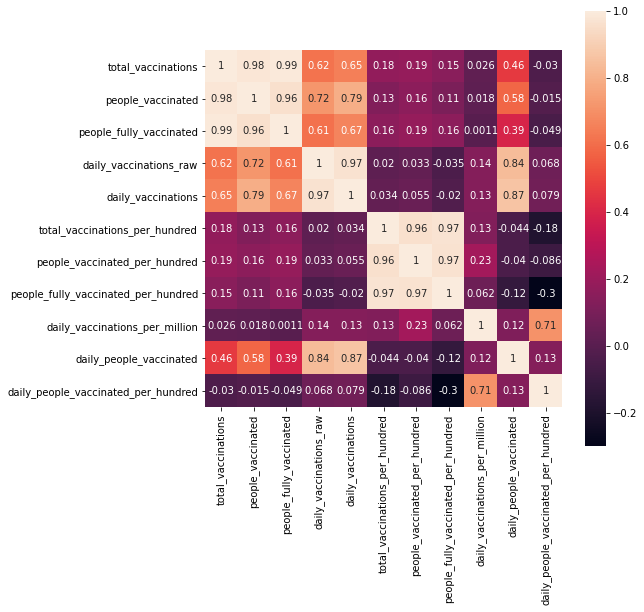

In [11]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

As we can see that people_vaccinated, daily_vaccinations_raw, people_fully_vaccinated_per_hundred columns are highly co-related with other column so we are dropping them.

In [12]:
df.drop(['people_vaccinated','daily_vaccinations_raw','daily_vaccinations_per_million'],axis= 1,inplace = True)

In [13]:
df.head()

country iso_code       date  total_vaccinations  \
0  Afghanistan      AFG 2021-02-22                 0.0   
1  Afghanistan      AFG 2021-02-23                 NaN   
2  Afghanistan      AFG 2021-02-24                 NaN   
3  Afghanistan      AFG 2021-02-25                 NaN   
4  Afghanistan      AFG 2021-02-26                 NaN   

   people_fully_vaccinated  daily_vaccinations  \
0                      NaN                 NaN   
1                      NaN              1367.0   
2                      NaN              1367.0   
3                      NaN              1367.0   
4                      NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_people_vaccinated  \
0                                  NaN                      NaN   
1                                  NaN                   1367.0   
2                                  NaN                   1367.0   
3                                  NaN                   1367.0   
4                                  NaN                   1367.0   

   daily_people_vaccinated_per_hundred  
0                                  NaN  
1                                0.003  
2                                0.003  
3                                0.003  
4                                0.003

<h1 ><center>Top countries with maximum total vaccinations.</center></h1> 


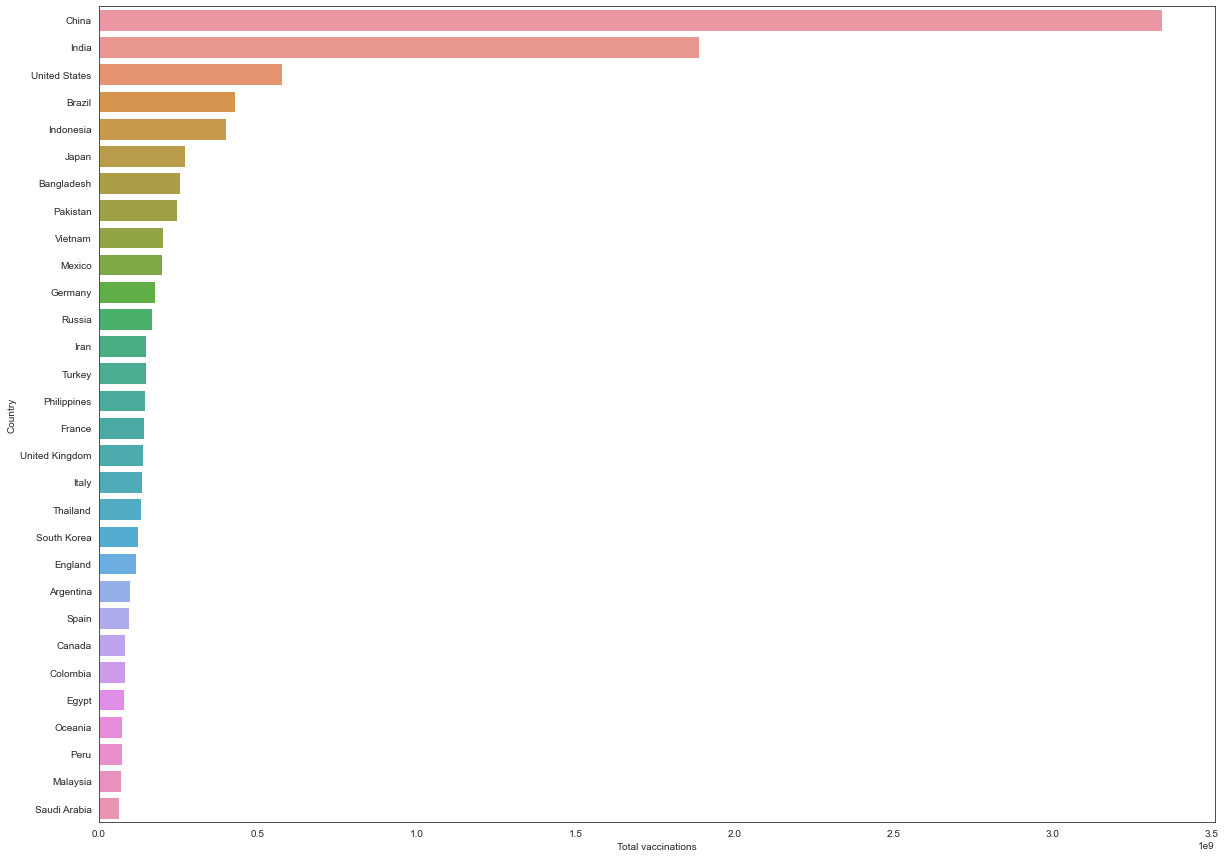

In [56]:
top_30 = df.groupby("country")['daily_vaccinations'].sum().sort_values(ascending= False).head(30)
sns.set_style("white")
plt.figure(figsize= (20,15))
ax= sns.barplot(top_30.values,top_30.index)
ax.set_xlabel("Total vaccinations")
ax.set_ylabel("Country")
plt.show()

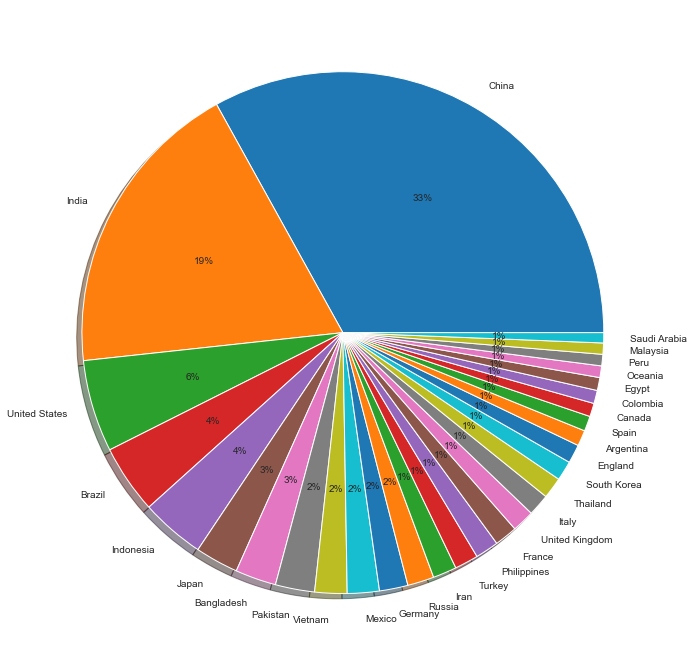

In [15]:

top_20 = df.groupby("country")['daily_vaccinations'].sum().sort_values( ascending= False).reset_index().head(30)
plt.figure(figsize= (20,12))
plt.pie(top_20['daily_vaccinations'],labels = top_20["country"],autopct = '%0.00f%%',shadow = True)
plt.show()

<h1 ><center>Top countries with maximum people vaccinated.</center></h1> 


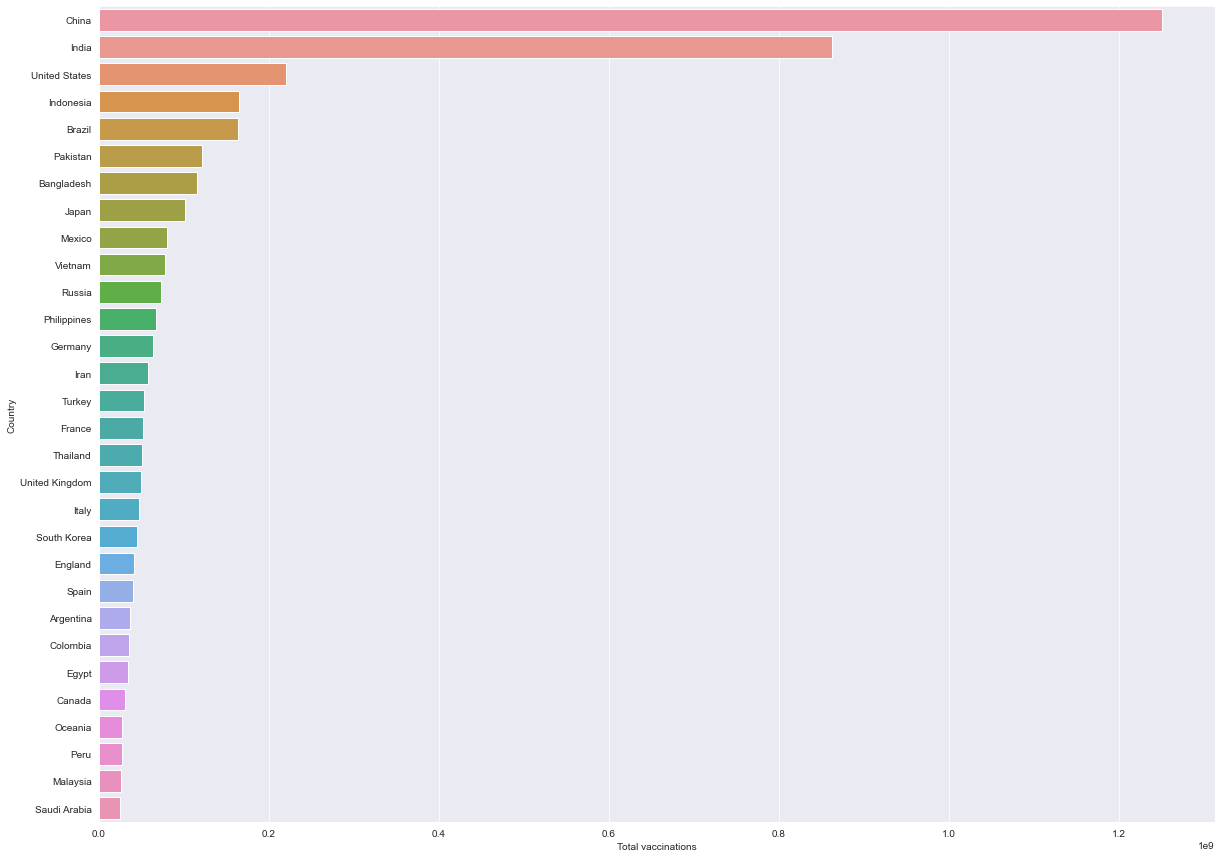

In [16]:
top_30 = df.groupby("country")['people_fully_vaccinated'].max().sort_values(ascending= False).head(30)
sns.set_style("darkgrid")
plt.figure(figsize= (20,15))
ax= sns.barplot(top_30.values,top_30.index)
ax.set_xlabel("Total vaccinations")
ax.set_ylabel("Country")
plt.show()

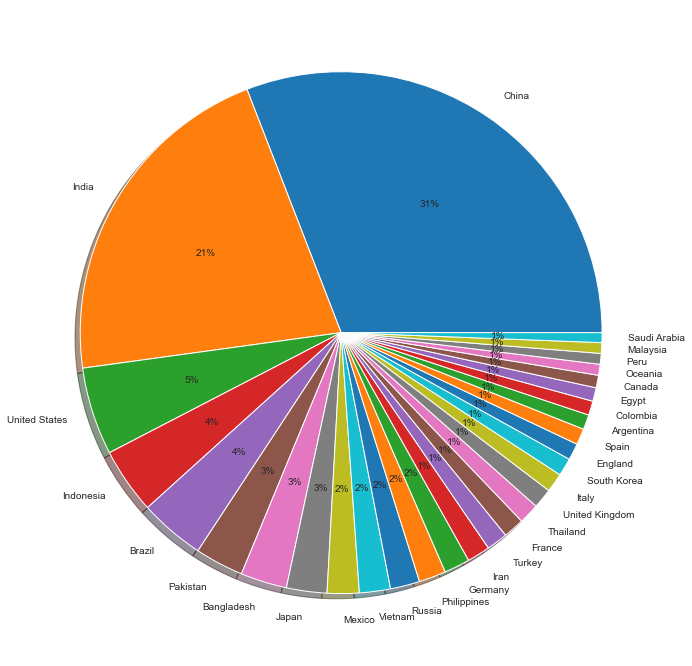

In [17]:
top_20 = df.groupby("country")['people_fully_vaccinated'].max().sort_values( ascending= False).reset_index().head(30)
plt.figure(figsize= (16,12))
plt.pie(top_20['people_fully_vaccinated'],labels = top_20["country"],autopct = '%0.00f%%',shadow = True)
plt.show()

<h1 ><center>Top countries with maximum daily people vaccinate per hundred.</center></h1> 


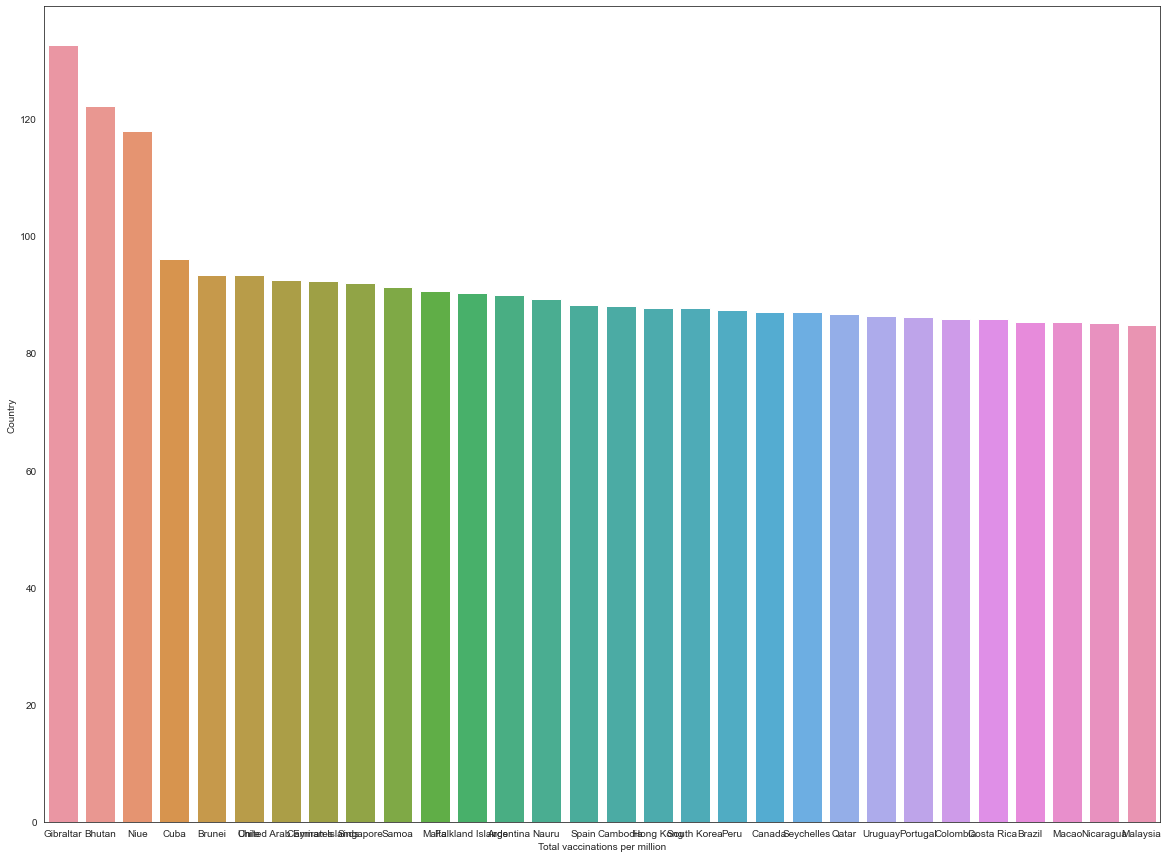

In [54]:
top_30 = df.groupby("country")['daily_people_vaccinated_per_hundred'].sum().sort_values(ascending= False).head(30)
sns.set_style("white")
plt.figure(figsize= (20,15))
ax= sns.barplot(top_30.index,top_30.values)
ax.set_xlabel("Total vaccinations per million")
ax.set_ylabel("Country")
plt.show()

<h1 ><center>Daily vaccination in world.</center></h1> 


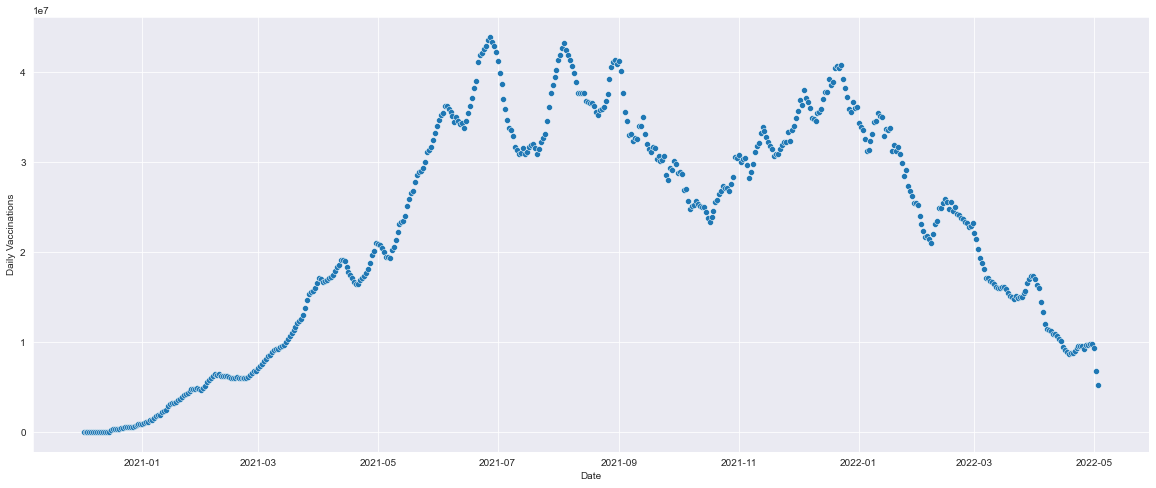

In [19]:
daily_vaccination = df.groupby("date").daily_vaccinations.sum()
plt.figure(figsize= (20,8))
sns.scatterplot(daily_vaccination.index,daily_vaccination.values)
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.show()


<h1><center>Daily vaccinations in India.</center></h1> 


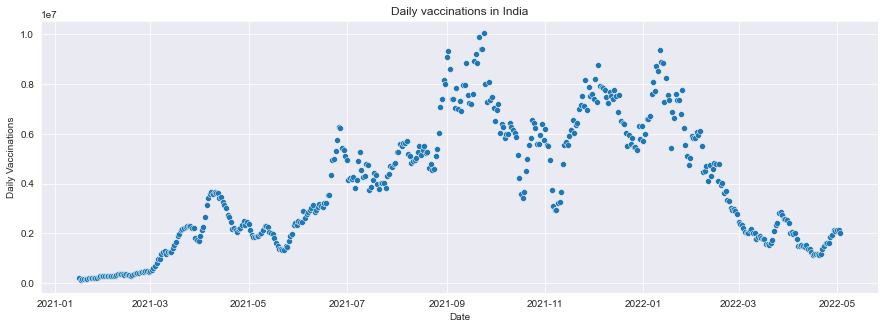

In [20]:
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.title("Daily vaccinations in India")
sns.scatterplot(x= "date",y= "daily_vaccinations",data= df[df["country"]=="India"])
plt.show()

In [21]:
print("Mean of daily vaccination in india:-", df[df["country"]=="India"]['daily_vaccinations'].mean())
print("Mode of daily vaccination in india:-", df[df["country"]=="India"]['daily_vaccinations'].mode())
print("Mode of daily vaccination in india:-", df[df["country"]=="India"]['daily_vaccinations'].median())


Mean of daily vaccination in india:- 3992792.575052854
Mode of daily vaccination in india:- 0    301348.0
dtype: float64
Mode of daily vaccination in india:- 3681917.0


<!-- <h1 ><center>Total vaccination in world.</center></h1>  -->

<h1 ><center>Total vaccination in India.</center></h1> 


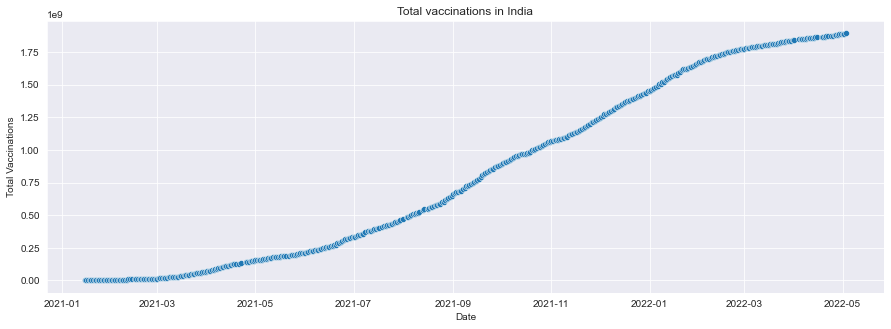

In [22]:
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in India")
sns.scatterplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="India"])
plt.show()

<h1 ><center>People fully vaccinated per hundered in world.</center></h1> 


<AxesSubplot:ylabel='Proportion'>

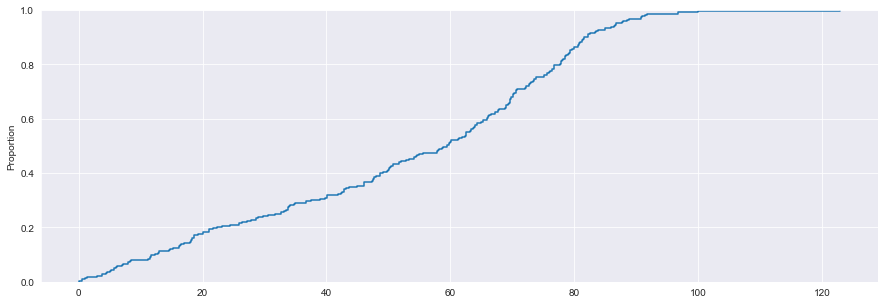

In [47]:
temp= df.groupby("country")['people_fully_vaccinated_per_hundred'].max().sort_values(ascending= False)
plt.figure(figsize= (15,5))
sns.ecdfplot(temp.values)


In [48]:
temp

country
Gibraltar                       122.94
Pitcairn                        100.00
United Arab Emirates             96.72
Brunei                           91.82
Singapore                        91.37
                                 ...  
Papua New Guinea                  2.89
Yemen                             1.37
Haiti                             1.07
Democratic Republic of Congo      0.56
Burundi                           0.09
Name: people_fully_vaccinated_per_hundred, Length: 223, dtype: float64

More than 122% of Gibraltar’s population is fully vaccinated against Covid-19. This figure exceeds 100% due to the doses received by Spaniards who cross the border to work or visit the territory every day.

<h1><center>Total vaccination per hundered in India.</center></h1> 


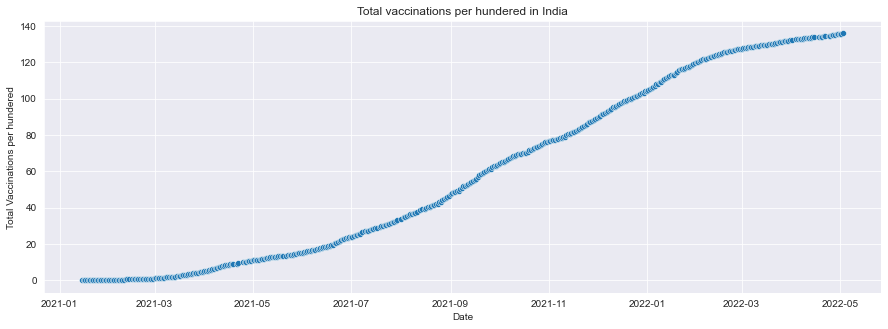

In [50]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations per hundered")
plt.title("Total vaccinations per hundered in India")
sns.scatterplot(x= "date",y= 'total_vaccinations_per_hundred',data= df[df["country"]=="India"])
plt.show()

<h1><center>Total people vaccinated per hundered in India.</center></h1> 


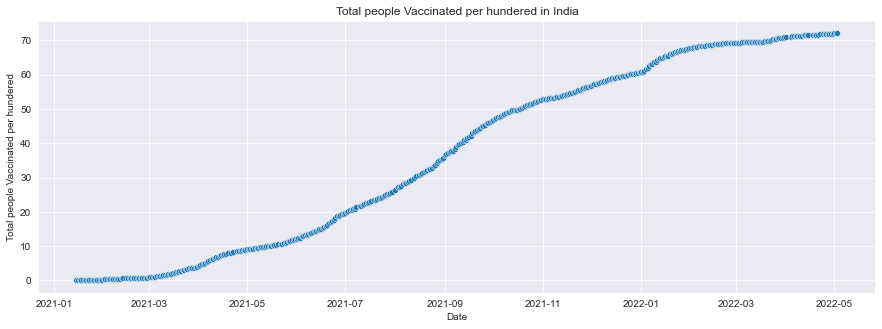

In [25]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total people Vaccinated per hundered")
plt.title("Total people Vaccinated per hundered in India")
sns.scatterplot(x= "date",y=  'people_vaccinated_per_hundred',data= df[df["country"]=="India"])
plt.show()

<!-- <h1 style='background:#ffed75; border:0; color:black'><center>Total people vaccinated per million in India.</center></h1> 
 -->

In [26]:
df2 = df[df['country'] == 'India'] 
df2 = df2.reset_index()

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

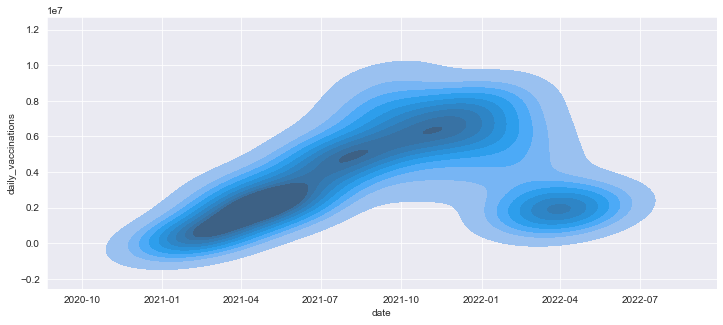

In [27]:
df_india = df[df['country'] == 'India'] 
df_india = df_india.reset_index()
plt.figure(figsize= (12,5))
sns.kdeplot(data = df_india, x = "date", y = "daily_vaccinations", fill = True)

<AxesSubplot:xlabel='daily_vaccinations', ylabel='Count'>

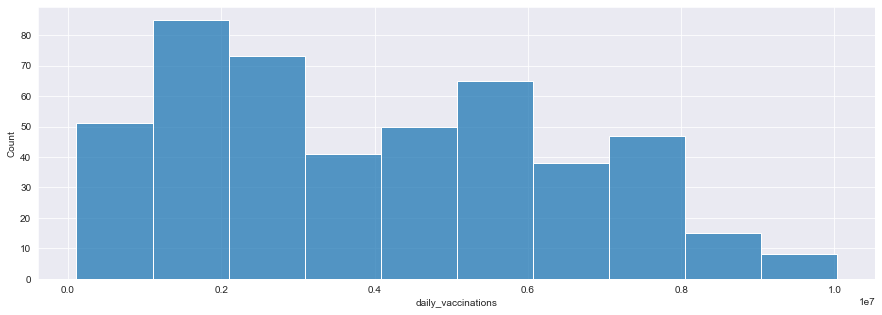

In [28]:
plt.figure(figsize= (15,5))
sns.histplot(data=df_india,x="daily_vaccinations", bins = 10)

<AxesSubplot:ylabel='daily_vaccinations'>

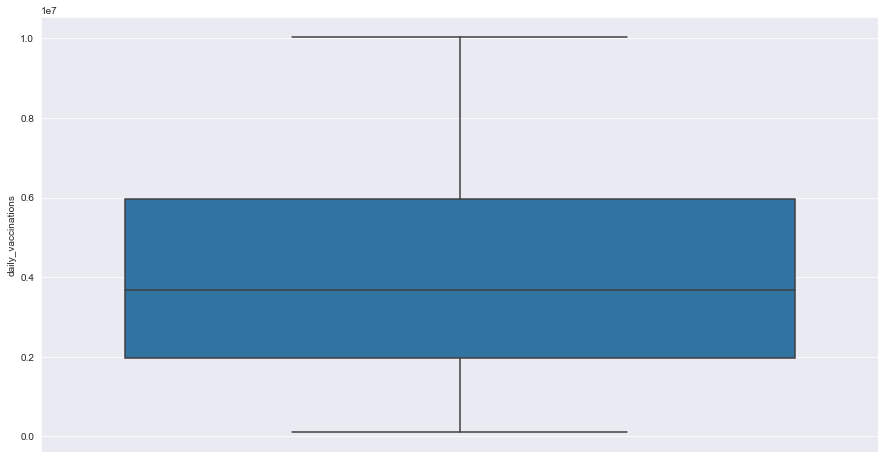

In [29]:
plt.figure(figsize= (15,8))
sns.boxplot(y = df_india['daily_vaccinations'])

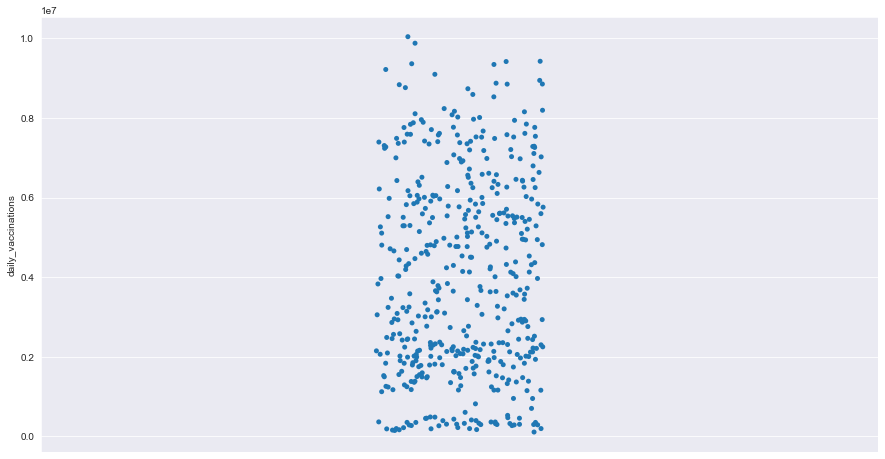

In [30]:
plt.figure(figsize= (15,8))
sns.stripplot(y = df_india['daily_vaccinations'])
plt.show()

<h1 ><center>Comparison of top 5 daily vaccination countries.</center></h1> 


In [31]:
top_5 = df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "India")| (df.country== "Brazil")|(df.country== "Indonesia")]

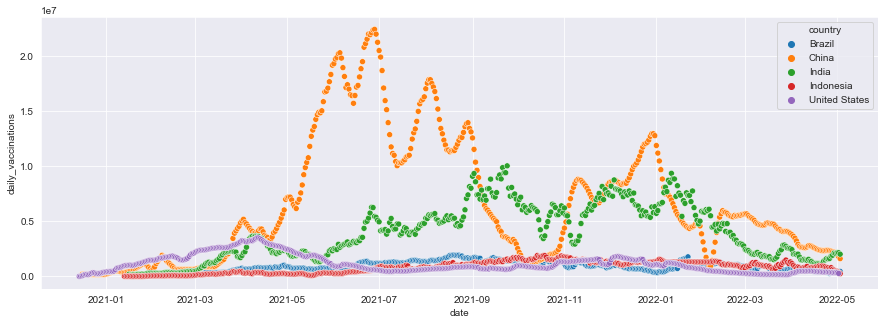

In [32]:
plt.figure(figsize= (15,5))
sns.scatterplot(x= "date",y= "daily_vaccinations" ,data= top_5,hue= "country")
plt.show()

<h1><center>Pair grid plot.</center></h1> 


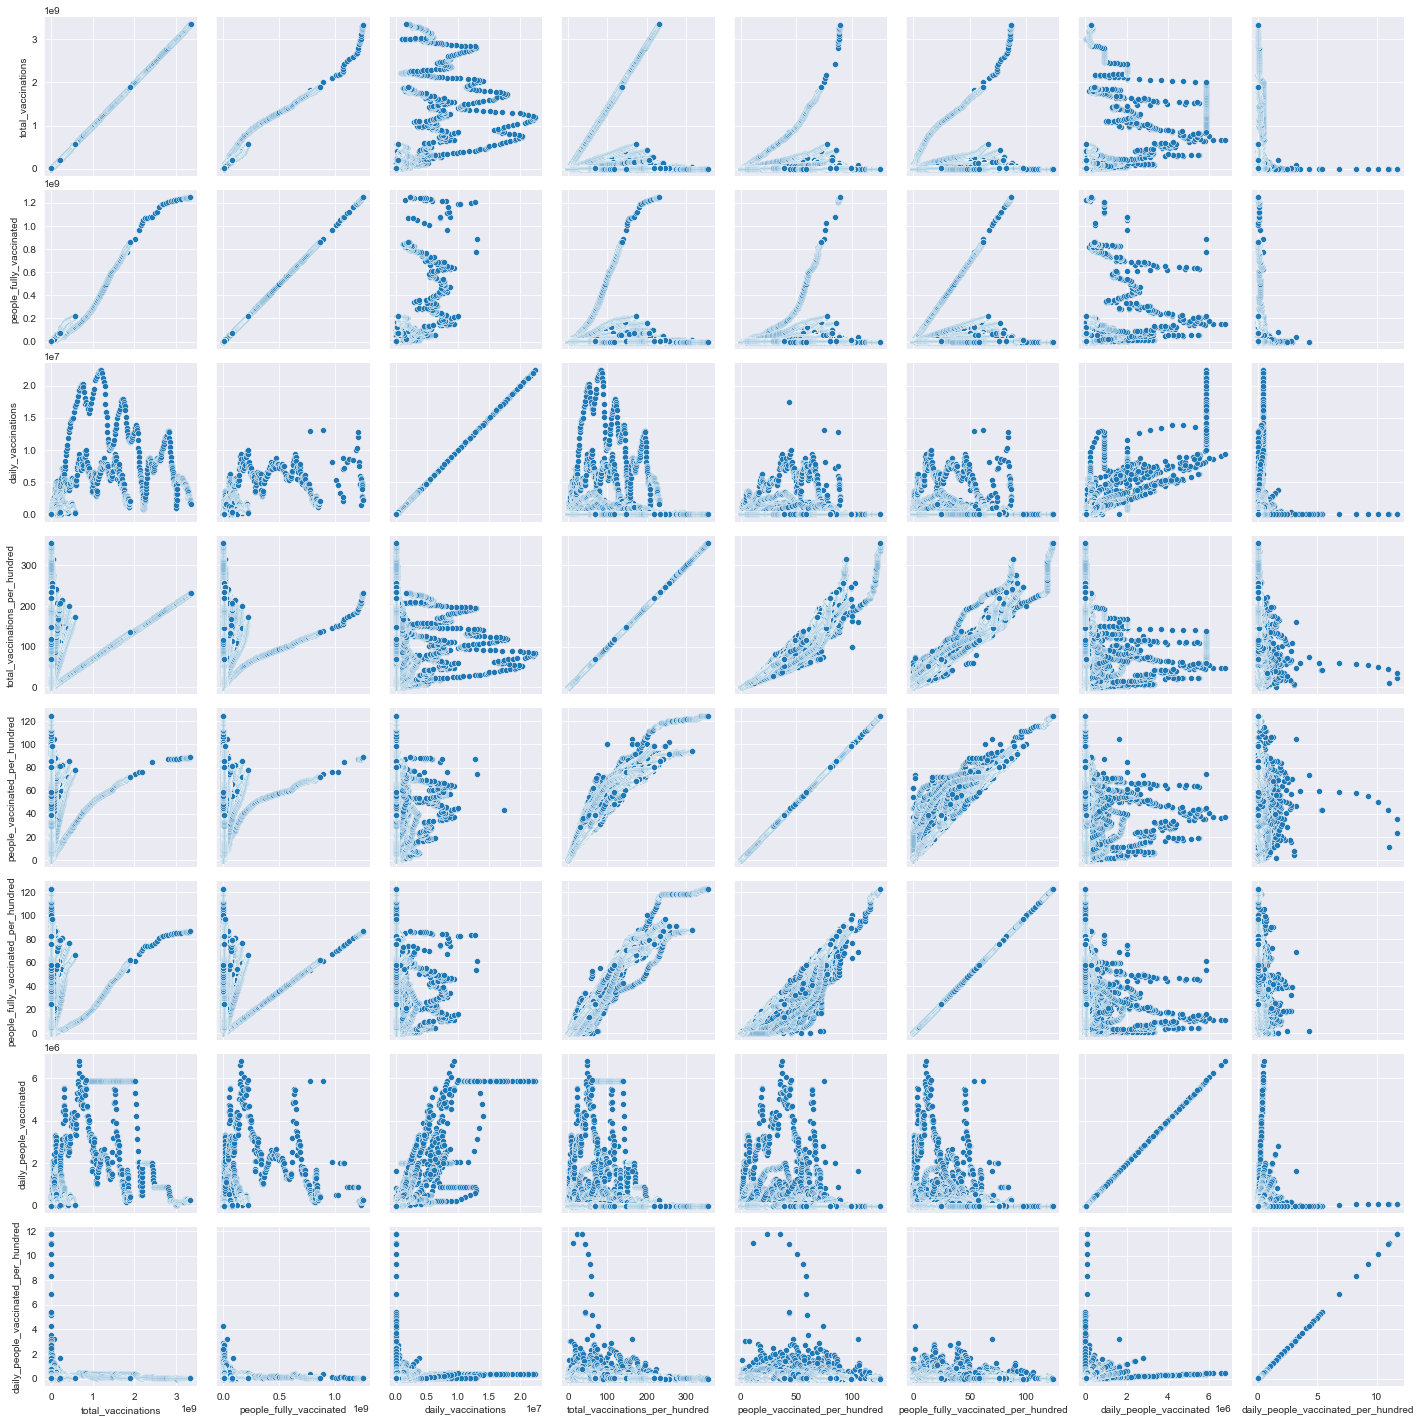

In [33]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)


<h1><center>Data of vaccinations used in different countries.</center></h1> 

Source :- https://github.com/owid/covid-19-data

In [34]:
df_vaccinnation = pd.read_csv("data/vaccinations-by-manufacturer.csv")

In [35]:
df_vaccinnation.head()

location        date             vaccine  total_vaccinations
0  Argentina  2020-12-29             Moderna                   2
1  Argentina  2020-12-29  Oxford/AstraZeneca                   6
2  Argentina  2020-12-29   Sinopharm/Beijing                   1
3  Argentina  2020-12-29           Sputnik V               20482
4  Argentina  2020-12-30             Moderna                   2

In [36]:
vacc_data = df_vaccinnation.groupby(['vaccine',"location"]).max().reset_index()
fig = px.treemap(vacc_data, path = ['vaccine','location'], values = 'total_vaccinations',
                title="Vaccines used in different countries")
fig.show()

In [37]:
vacc_data = df_vaccinnation.groupby(["location",'vaccine']).max().reset_index()
fig = px.treemap(vacc_data, path = ['location','vaccine'], values = 'total_vaccinations',
                title="Vaccines used by different countries")
fig.show()

<h1><center>Data of vaccination for different states of India.</center></h1> 
Source :- https://data.gov.in/

In [38]:
df_state = pd.read_csv("data/IndiaStateWise.csv")
df_state.head()

Sl. No.                   State/UT  1st Dose - HCWs  1st Dose - FLWs  \
0        1  Andaman & Nicobar Islands             5269             9350   
1        2             Andhra Pradesh           474372          1359194   
2        3          Arunachal Pradesh            23858            73371   
3        4                      Assam           216598           438392   
4        5                      Bihar           519592           551973   

   1st Dose - 45+ years  1st Dose - 18-44 years  
0               96871.0                 81228.0  
1            10101434.0               2975383.0  
2              208126.0                348081.0  
3             3385722.0               3918047.0  
4             8779438.0               8803943.0

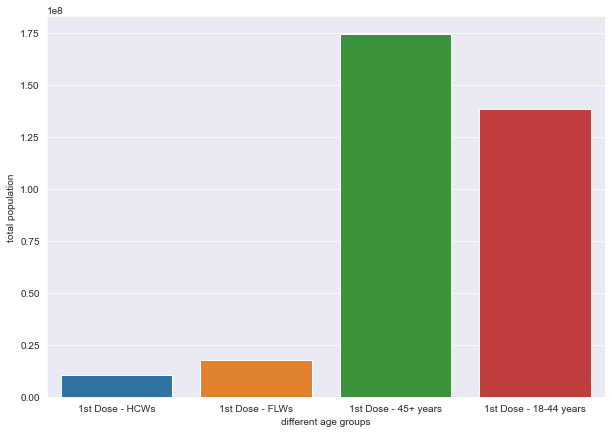

In [39]:
columns = []
value = []
for col in df_state.columns[2:]:
    columns.append(col)
    value.append(df_state[col].sum())
sns.set_style("darkgrid")
plt.figure(figsize= (10,7))
ax= sns.barplot(columns,value)
ax.set_xlabel("different age groups")
ax.set_ylabel("total population")
plt.show()

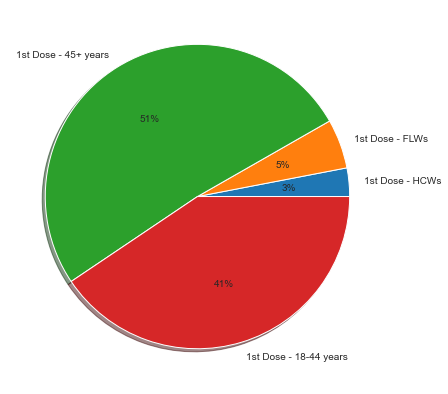

In [40]:
plt.figure(figsize= (10,7))
plt.pie(value, labels = columns,autopct = '%0.0f%%',shadow = True)
plt.show()

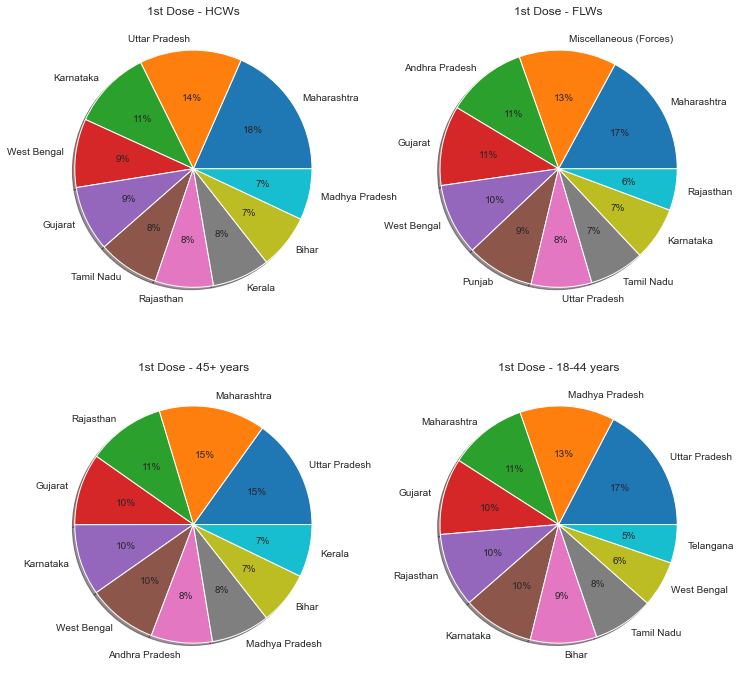

<Figure size 720x576 with 0 Axes>

In [41]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

plt.figure(figsize= (10,8))
points=df_state.sort_values(ascending= False, by = '1st Dose - HCWs').head(10)
axes[0,0].pie(points['1st Dose - HCWs'], labels = points['State/UT'],autopct = '%0.0f%%',shadow = True)
axes[0,0].set_title("1st Dose - HCWs")

points=df_state.sort_values(ascending= False, by = '1st Dose - FLWs').head(10)
axes[0,1].pie(points['1st Dose - FLWs'], labels = points['State/UT'],autopct = '%0.0f%%',shadow = True)
axes[0,1].set_title("1st Dose - FLWs")

points=df_state.sort_values(ascending= False, by = '1st Dose - 45+ years').head(10)
axes[1,0].pie(points['1st Dose - 45+ years'], labels = points['State/UT'],autopct = '%0.0f%%',shadow = True)
axes[1,0].set_title("1st Dose - 45+ years")

points=df_state.sort_values(ascending= False, by = '1st Dose - 18-44 years').head(10)
axes[1,1].pie(points['1st Dose - 18-44 years'], labels = points['State/UT'],autopct = '%0.0f%%',shadow = True)
axes[1,1].set_title("1st Dose - 18-44 years")

plt.show()

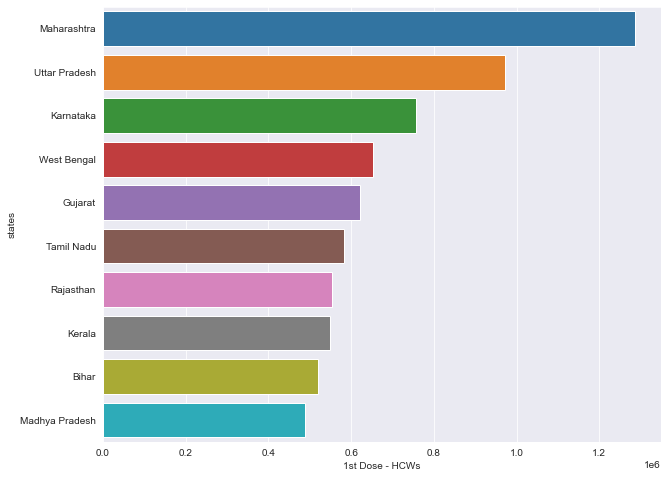

In [42]:

sns.set_style("darkgrid")
plt.figure(figsize= (10,8))
points=df_state.sort_values(ascending= False, by = '1st Dose - HCWs').head(10)
ax= sns.barplot(points['1st Dose - HCWs'], points['State/UT'])
ax.set_xlabel("1st Dose - HCWs")
ax.set_ylabel("states")
plt.show()

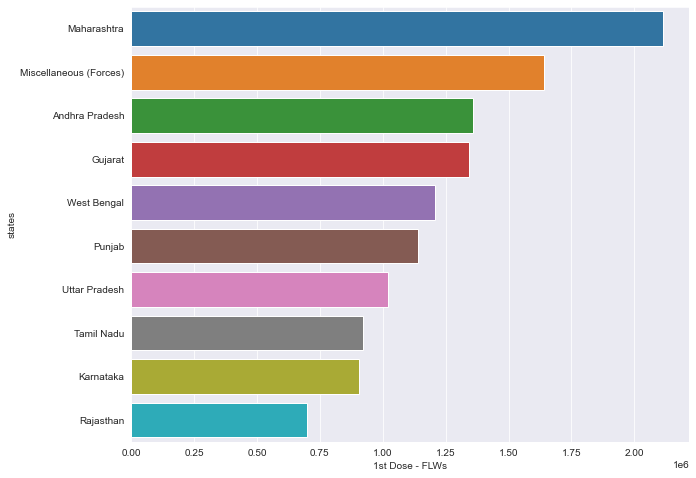

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize= (10,8))
points=df_state.sort_values(ascending= False, by = '1st Dose - FLWs').head(10)
ax= sns.barplot(points['1st Dose - FLWs'], points['State/UT'])
ax.set_xlabel("1st Dose - FLWs")
ax.set_ylabel("states")
plt.show()

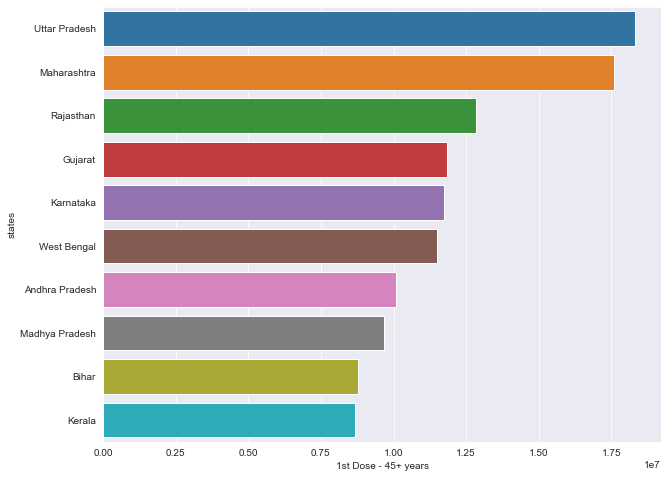

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize= (10,8))
points=df_state.sort_values(ascending= False, by = '1st Dose - 45+ years').head(10)
ax= sns.barplot(points['1st Dose - 45+ years'], points['State/UT'])
ax.set_xlabel("1st Dose - 45+ years")
ax.set_ylabel("states")
plt.show()

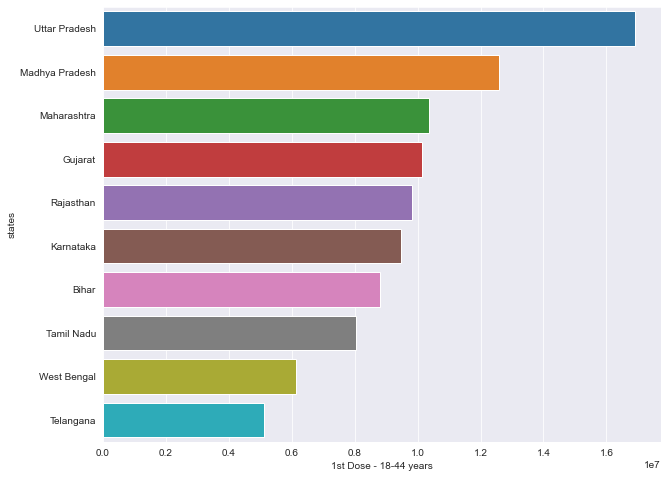

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize= (10,8))
points=df_state.sort_values(ascending= False, by = '1st Dose - 18-44 years').head(10)
ax= sns.barplot(points['1st Dose - 18-44 years'], points['State/UT'])
ax.set_xlabel("1st Dose - 18-44 years")
ax.set_ylabel("states")
plt.show()

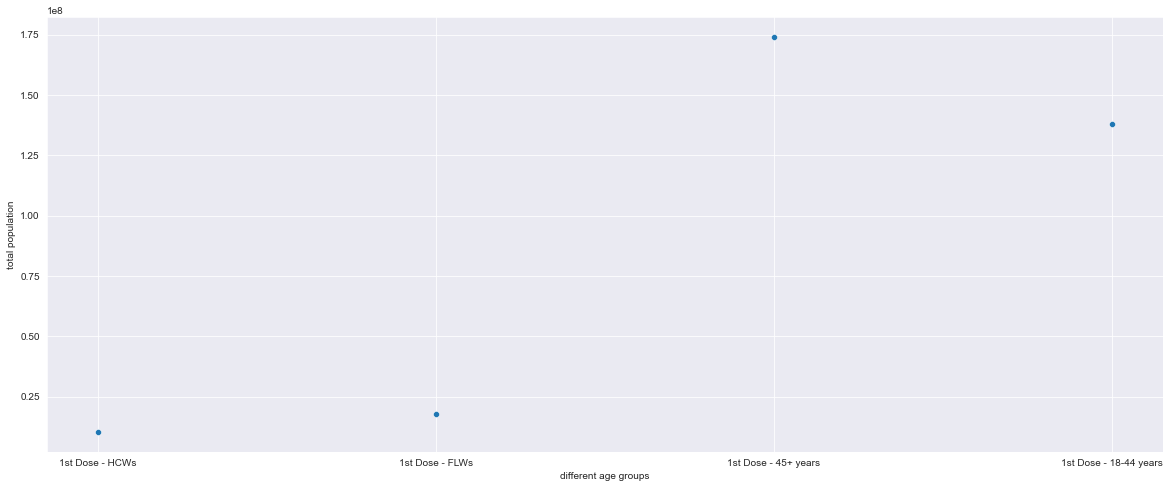

In [46]:
columns = []
value = []
for col in df_state.columns[2:]:
    columns.append(col)
    value.append(df_state[col].sum())
plt.figure(figsize= (20,8))
sns.scatterplot(columns,value)
plt.xlabel("different age groups")
plt.ylabel("total population")
plt.show()
